In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate):
        self.alpha = None
        self.b = None
        self.w = None
        self.learning_rate = learning_rate
        self.x_train, self.label = self.generate_data()
        
    def generate_data(self, N=200):
        data = []
        label = []
        for i in range(N):
            x = round(random.uniform(0, 10), 3)
            y = round(np.random.normal(loc=5, scale=5), 3)
            line = -3 * x + 20
            data.append([x, y])
            label.append(1 if y-line >= 0 else -1)

        return np.array(data), np.array(label)
    
    def training(self):
        num_samples, num_features = self.x_train.shape
        self.w = np.random.randn(num_features)
        self.b = np.random.randn()
        
        while True:
            error_points = []
            for i in range(num_samples):
                # y * (w * x + b)
                if self.label[i] * (np.dot(self.x_train[i], self.w) + self.b) <= 0:
                    error_points.append([self.x_train[i], self.label[i]])
            
            if len(error_points) == 0:
                break
            
            random_i = np.random.randint(0, len(error_points))
            random_x = error_points[random_i][0]
            random_label = error_points[random_i][1]
            self.w = self.w + self.learning_rate * random_label * random_x
            self.b = self.b + self.learning_rate * random_label
            
        return self.w, self.b
    
    def training_duality(self):
        num_samples, num_features = self.x_train.shape
        self.alpha = np.zeros((num_samples))
        self.b = 0
        
        gram = np.dot(self.x_train, self.x_train.T)
        
        while True:
            error_count = 0
            for i in range(num_samples):
                inner_product = gram[i]
                distance = self.label[i] * (np.sum(self.alpha*self.label*inner_product) + self.b)
                if distance <= 0:
                    self.alpha[i] = self.alpha[i] + self.learning_rate
                    self.b = self.b + self.learning_rate * self.label[i]
                    error_count += 1
            
            if error_count == 0:
                break
                
        self.w = np.sum(self.alpha * self.label * self.x_train.T, axis=1)
        
        return self.w, self.b
    
    def plot_figure(self):
        x_ = np.array([i for i in range(10)])
        slope = -self.w[0]/self.w[1]
        intercept = -self.b/self.w[1]
        y_ = slope * x_ + intercept
        
        plt.scatter(self.x_train[:, 0], self.x_train[:, 1], c=self.label)
        plt.plot(y_)
        plt.show()
        
        return slope, intercept
        

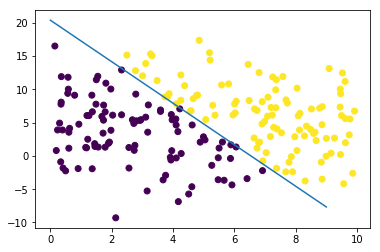

-3.1163276540113576 20.38378671867161


In [47]:
per = Perceptron(learning_rate=0.01)
per.training()
w, b = per.plot_figure()
print(w, b)

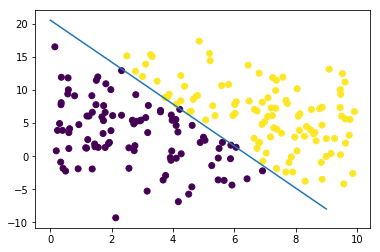

-3.164859779589698 20.51787474240696


In [48]:
per.training_duality()
w, b = per.plot_figure()
print(w, b)

In [50]:
per.alpha.shape

(200,)

In [71]:
a = np.array([[1,2,3], [5,6,7], [9,10,11]])
b = np.array([[3,4,5], [7,8,9], [11,12,13]])
a*b

array([[  3,   8,  15],
       [ 35,  48,  63],
       [ 99, 120, 143]])

In [72]:
np.dot(a, b.T)

array([[ 26,  50,  74],
       [ 74, 146, 218],
       [122, 242, 362]])

In [73]:
np.matmul(a, b.T)

array([[ 26,  50,  74],
       [ 74, 146, 218],
       [122, 242, 362]])